# Normal Score Transform

In [9]:
import sys
ppath = "../.."

if ppath not in sys.path:
    sys.path.append(ppath)

import pygeostatistics as pygs
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Read Spatial Data:

In [34]:
from pygeostatistics.gslib_reader import SpatialData

data = SpatialData('../../testData/test.gslib')

print(data.df.shape)

vr = data.vr['por']
vr[:20]

(85, 4)


array([14.6515, 14.5093, 14.0639, 15.1084, 13.919 , 13.1304, 14.5724,
       15.0814, 13.91  , 13.4024, 14.9395, 15.2159, 14.5777, 14.2483,
       14.4281, 15.2606, 16.1859, 14.2079, 16.9583, 13.8354])

### Setup Normal Score Transform:

In [10]:
from pygeostatistics.normal_score_transform import NormalScoreTransform

nst = NormalScoreTransform(
    vr, np.ones_like(vr),
    0, 30,
    0, 1,
    15, 1)
nst.create_transform_func()

### Tranform Data to Normal Score (forward):

In [33]:
normal_score = nst.transform(vr)

normal_score[:20]

array([ 1.49005024e-08, -1.47987098e-01, -7.40785459e-01,  4.57851945e-01,
       -9.51843262e-01, -1.73719397e+00, -1.18233857e-01,  3.30295806e-01,
       -9.99304789e-01, -1.42921943e+00,  2.07916558e-01,  6.28904221e-01,
       -8.85849411e-02, -5.24400524e-01, -2.07916558e-01,  6.65262904e-01,
        1.88950998e+00, -5.58547494e-01,  2.51912447e+00, -1.10170891e+00])

### Transform Normal Score to Data (backward):

In [32]:
vr_back = nst.back_transform(normal_score)

vr_back[:20]

array([14.6515, 14.5093, 14.0639, 15.1084, 13.919 , 13.1304, 14.5724,
       15.0814, 13.91  , 13.4024, 14.9395, 15.2159, 14.5777, 14.2483,
       14.4281, 15.2606, 16.1859, 14.2079, 16.9583, 13.8354])

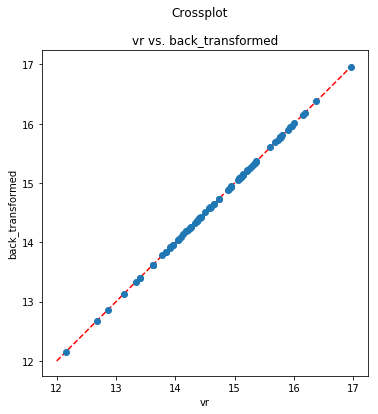

In [62]:
fig, ax = plt.subplots()
sc = ax.scatter(vr, vr_back, zorder=10)
line, = ax.plot(np.arange(12,18), np.arange(12,18), linestyle='--', color='red', zorder=1)
info = ax.set( 
    xlabel='vr', ylabel='back_transformed', aspect=1, title="vr vs. back_transformed"
    )
fig.set(figwidth=6, figheight=6)
sup = fig.suptitle("Crossplot")

### Plot Data and their cumaltive histograms:

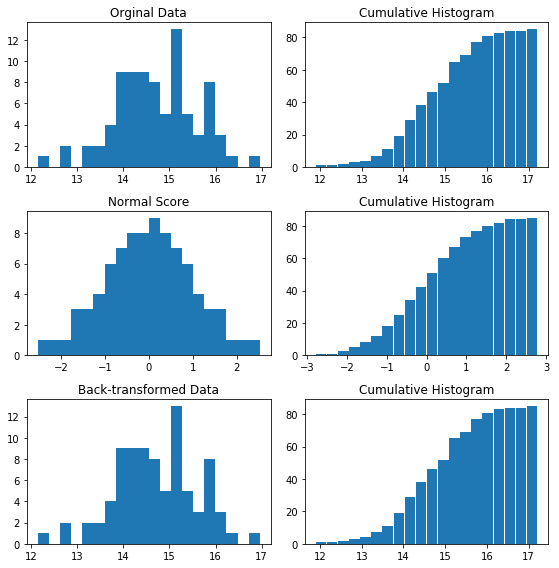

In [53]:
fig, axes = plt.subplots(ncols=2, nrows=3)

freq = stats.cumfreq(vr, numbins=20)
x = freq.lowerlimit + np.linspace(
    0, freq.binsize*freq.cumcount.size, freq.cumcount.size)

axes[0][0].hist(vr, bins=20)
axes[0][0].set(title="Orginal Data")

axes[0][1].bar(x, freq.cumcount, width=freq.binsize)
axes[0][1].set(title="Cumulative Histogram")

freq2 = stats.cumfreq(normal_score, numbins=20)

x2 = freq2.lowerlimit + np.linspace(
    0, freq2.binsize*freq2.cumcount.size, freq2.cumcount.size)
axes[1][0].hist(normal_score, bins=20)
axes[1][0].set(title="Normal Score")

axes[1][1].bar(x2, freq2.cumcount, width=freq2.binsize)
axes[1][1].set(title="Cumulative Histogram")

freq3 = stats.cumfreq(vr_back, numbins=20)

x3 = freq3.lowerlimit + np.linspace(
    0, freq3.binsize*freq3.cumcount.size, freq3.cumcount.size)
axes[2][0].hist(vr_back, bins=20)
axes[2][0].set(title="Back-transformed Data")

axes[2][1].bar(x3, freq3.cumcount, width=freq3.binsize)
axes[2][1].set(title="Cumulative Histogram")

size = fig.set(figheight=8, figwidth=8)
plt.tight_layout()